<a href="https://colab.research.google.com/github/thatothapo/computationalphysics/blob/main/CP_Tut_3_Thato_Thapo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Physics Tutorial 3

## Question 1

We want to use Monte Carlo integration with importance sampling to estimate the integral: $$ I = \int^{6}_{-1} dx \int^{5}_{0} dy \int^{5}_{0} dz e^{-\tfrac{x}{3}} \bigg(1+0.1\log \sqrt{x^{2} + y^{2} + z^{x} + 1}\bigg)$$

So taking $ f(x,y,z) = e^{-x/3} (1+0.1\log \sqrt{x^{2} + y^{2} + z^{x} + 1})$ we can choose out weight function (with normalization) to be $$ w(x) = \frac{e^{6}}{e^{7}-1}e^{-x} $$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random

In [ ]:
N = 10000
a,b,c,d,e,f_ = -1,6,0,5,0,5        # Integration bounds [a,b,c,d,e,f]

def f(x_,y_,z_):
    return np.exp(-x_/3)*(1+0.1*np.log(np.sqrt(x_**2 + y_**2 + z_**2 + 1)))

def w(x_):
    return (np.exp(6)/(np.exp(7)-1))*np.exp(-x_)

We then use the Rejection method to sample $x$ from the weight function, while sampling $y$ and $z$ from the normal distribution, to then calculate the integral $$ I \approx (b-a)(d-c)(f-e)\frac{1}{N}\sum^{N}_{i=1} w(x_{i})\frac{f(x_{i}}{w(x_{i})} $$

In [ ]:
# Rejection method to sample x

x1 = np.linspace(a, b, N)
rv = w(x1)
ru = random.uniform(a, b, N)

X = []
#R = []
for i in range(N):
    if rv[i] < w(ru[i]):
        X.append(ru[i])
#        R.append(rv[i])

x = np.array(X)
y = random.uniform(c, d, len(x))
z = random.uniform(e, f_, len(x))

S = ((b-a)*(d-c)*(f_-e)/N)*sum(w(x)*(f(x,y,z)/w(x)))

print(S)

74.27632718697221


## Question 2

Want to use the Metropolis method to estimate: $$ \langle x \rangle = \frac{\int^{\infty}_{0}xe^{-x}dx}{\int^{\infty}_{0}e^{-x}dx}. $$ First we want to generate a sequence of $x_{i}$ according to $p(x) = e^{-x}$, take $x = [0,20]$

[ 1.20132893e-17 -1.66570586e-01 -3.07313114e-01  4.39196511e-01
  5.47060860e-01 -2.21419122e+00 -5.10890411e-01 -2.25527560e+00
 -3.39034057e+00 -6.28163759e+00 -7.61812615e+00 -6.77139808e+00
 -5.15375045e+00 -7.46912196e+00 -9.27621094e+00 -1.07399267e+01
 -1.13915239e+01 -1.28085230e+01 -1.20809093e+01 -1.50619475e+01
 -1.57066463e+01 -1.70974740e+01 -1.75295241e+01 -1.79339527e+01
 -1.88509678e+01 -1.84085662e+01 -1.92022274e+01 -1.79091320e+01
 -1.76831632e+01 -1.99608698e+01 -1.85034308e+01 -1.72900793e+01
 -1.54068080e+01 -1.75067722e+01 -1.93221379e+01 -2.20666539e+01
 -2.41781195e+01 -2.48862663e+01 -2.48277870e+01 -2.57843615e+01
 -2.82604892e+01 -2.76621939e+01 -2.84425767e+01 -3.03784953e+01
 -3.28702966e+01 -3.40173438e+01 -3.63431961e+01 -3.66169379e+01
 -3.79870370e+01 -3.98948548e+01 -3.83899898e+01 -3.70307735e+01
 -3.63468858e+01 -3.62792088e+01 -3.61924225e+01 -3.67991615e+01
 -3.77044181e+01 -3.89362400e+01 -4.16618632e+01 -4.19252983e+01
 -4.04242173e+01 -4.04616

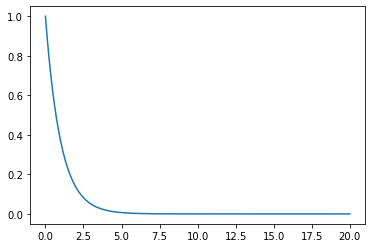

In [ ]:
N = 1000

a, b = 0, 20

def p(x_):
    return np.exp(-x_)

xp = np.linspace(a, b, N)

pmax = max(p(xp))
# print(pmax)

def p1(x_):
    return p(x_) - pmax

x0_guess = 1.0
x0 = fsolve(p1,x0_guess)[0]                     #point at which p(x) is at its maximum
# print(x0)
# print(p(x0))

xx = [x0]
# xx_not = []

delta = 3

d = random.uniform(-delta,delta,N)

r = random.random(N)

for i in range(N):
    xt = xx[i]+d[i]
    w = p(xt)/p(xx[i])
    if w >= 1:
        xx.append(xt)
    else:
        if r[i] <= w:
            xx.append(xt)
        else:
#             xx_not.append(xt)
            xx.append(xx[i])

x_true = []

for i in range(len(xx)-1):
    if xx[i] != xx[i+1]:
        x_true.append(xx[i])

x_true = np.array(x_true)
print(x_true)

binwidth = (b-a)/25
bins = np.arange(np.floor(min(x_true)), np.floor(max(x_true))+binwidth, binwidth)


plt.plot(xp,p(xp))
# plt.hist(x_true,bins)
# plt.draw()
plt.show()

Still does not work properly unfortunately